In [1]:
import sys
import os
os.chdir('/home/jetske22/sign_cas/Sign-Language-Thesis-main/')

%load_ext autoreload
%autoreload 2

from dataset.labels.split_dataset import main as split_dataset
from dataset.labels.eaf_parser import main as eaf_parser

from dataset.statistics.data_statistics import *

from models.simple.random_detector import RandomShakeDetector
from models.simple.memory_detector import MemoryBasedShakeNodDetector
from models.simple.rule_detector import RuleBasedShakeDetector
from models.simple.detector import ShakeNodDetector

from pose.analyze_results import calculate_statistics as analyze_results
from pose.review_conflicts import review_all as review_all_conflicts
from pose.review_conflicts import play_case as play_one_case
from pose.mp_detector import MediaPipePoseDetector
import pose.analyze_results


2024-06-25 14:22:22.849909: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 14:22:23.459685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 14:22:23.460511: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 14:22:23.597851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 14:22:23.896661: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 14:22:23.904104: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [93]:
### DGS PREPROCESSING ###
### First: only add dgs eafs to eaf_files folder ###

import dataset.preparation.create_overview as create_overview
# Make an overview csv from all videos/annotations it can find
create_overview(output_path='data/store/overview-test.csv')

# add the headpose paths to the overview to make the frames csv file
from models.processing.facial_movement import create_pose_csv
create_pose_csv('data/store/overview-test.csv', 'data/output/frames-test.csv', 'data/pose_detections')

from dataset.labels.create_label_files import main as create_label_files
from dataset.statistics.data_statistics import count_shakes_nods
# Create label files for the frames given all eaf files
create_label_files('data/eaf_files/v2', 'data/output', 'data/output/frames-test.csv', 'data/pose_detections', add_starts_ends=True)

# Divide into 4 splits (that is: only use for training)
from dataset.labels.split_dataset_dgs import main as split_dataset_dgs
split_dataset_dgs('data/output/frames-test.csv')

(17, 15, 19)
(17, 17, 20)
(17, 12, 20)
(17, 22, 20)
(17, 9, 19)
(17, 23, 19)
(17, 7, 19)
(17, 14, 19)
(17, 9, 20)
(17, 22, 20)
Split 1: Nr nods: 285, Nr shakes: 194
Split 2: Nr nods: 285, Nr shakes: 194
Split 3: Nr nods: 284, Nr shakes: 194
Split 4: Nr nods: 284, Nr shakes: 193
Split 1: [('1177002-0_B004', 2), ('1177002-10_B004', 2), ('1177002-11_B004', 2), ('1177002-12_B004', 2), ('1177002-13_B004', 1), ('1177002-14_B004', 1), ('1177002-15_B004', 2), ('1177002-16_B004', 1), ('1177002-17_B004', 2), ('1177002-18_B004', 1), ('1177002-19_B004', 1), ('1177002-1_B004', 1), ('1177002-20_B004', 2), ('1177002-21_B004', 1), ('1177002-22_B004', 2), ('1177002-23_B004', 1), ('1177002-24_B004', 2), ('1177002-25_B004', 1), ('1177002-26_B004', 2), ('1177002-27_B004', 1), ('1177002-28_B004', 1), ('1177002-29_B004', 2), ('1177002-2_B004', 2), ('1177002-30_B004', 2), ('1177002-31_B004', 2), ('1177002-32_B004', 2), ('1177002-33_B004', 2), ('1177002-34_B004', 1), ('1177002-35_B004', 2), ('1177002-36_B004'

In [7]:
### NGT PREPROCESSING ###
### First: only add dgs eafs to eaf_files folder ###
 
import dataset.preparation.create_overview as create_overview
# Make an overview csv from all videos/annotations it can find
create_overview(output_path='data/store/overview.csv')

# add the headpose paths to the overview to make the frames csv file
from models.processing.facial_movement import create_pose_csv
create_pose_csv('data/store/overview.csv', 'data/output/frames.csv', 'data/pose_detections')

from dataset.labels.create_label_files import main as create_label_files
from dataset.statistics.data_statistics import count_shakes_nods

# Create label files for the frames given all eaf files
create_label_files('data/eaf_files/v1', 'data/output', 'data/output/frames.csv', 'data/pose_detections', add_starts_ends=True)

# # TODO: split by signer!!!
split_dataset('data/output/frames.csv')


Searching for annotation files in data/eaf_files
Found 4558 annotation files
Parsed annotation directory
Found 196 videos
Writing results to data/store/overview.csv
Complete!
Labels saved!
Number of shakes: 1822
Number of nods: 454
Removing video:  CNGT0430_S021
Removing video:  CNGT0488_S024
Total count:  2245
Shake count:  1796
Nod count:  449
Nod counts per fold: [69. 79. 83. 70. 68.]
Shake counts per fold: [278. 270. 271. 303. 286.]


Number of shakes: 1898
Number of nods: 428
Mean shake length: 27.103793466807165
Mean nod length: 33.33411214953271
Std shake length: 19.225309219554337
Std nod length: 29.718744751962227
Unsure shakes: 84
Unsure nods: 7
1898
Most common shake length:  17


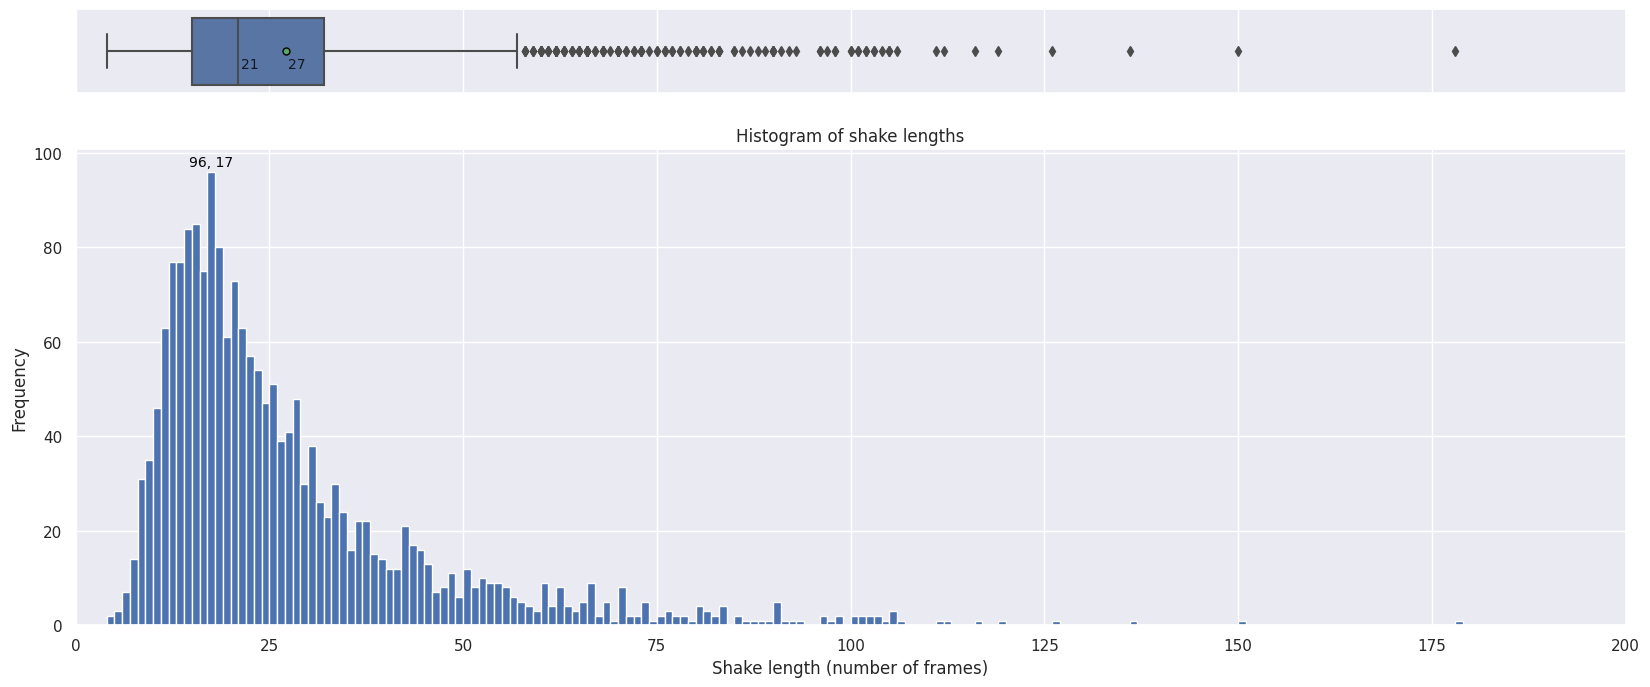

428
Most common nod length:  12


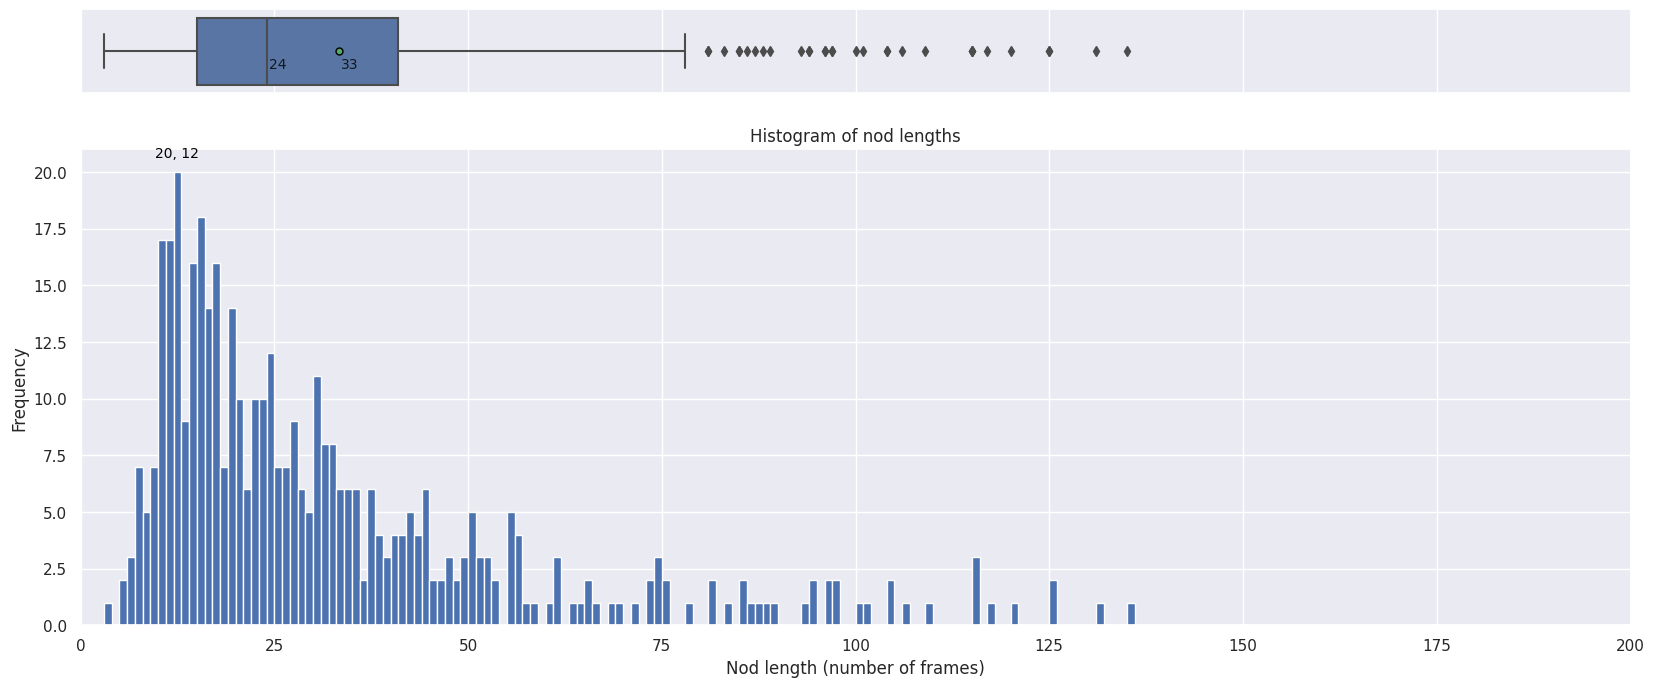

---------
Number of shakes: 1906
Number of nods: 461
Mean shake length: 27.100209863588667
Mean nod length: 32.837310195227765
Std shake length: 19.23699135162144
Std nod length: 28.962493445910862
Unsure shakes: 84
Unsure nods: 7
1906
Most common shake length:  17


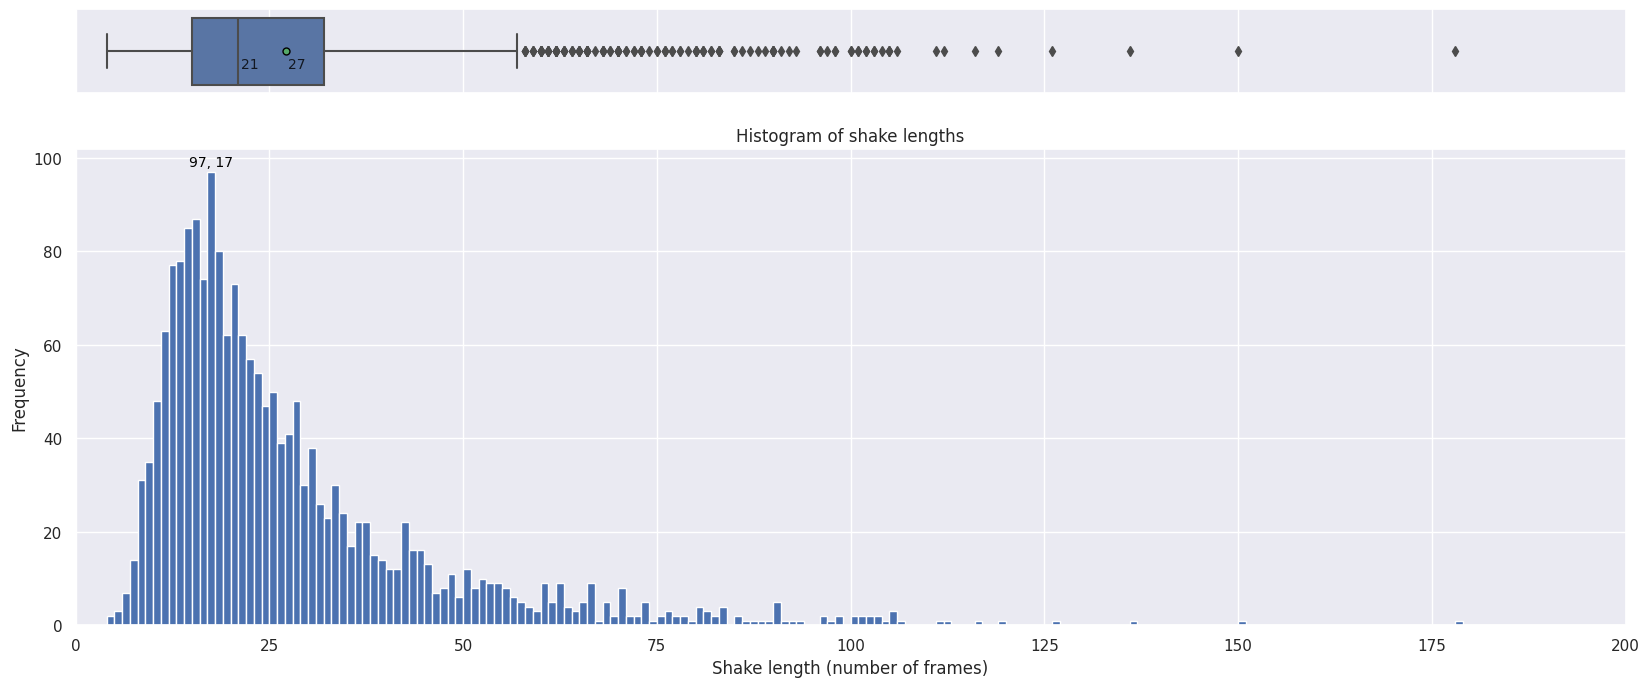

461
Most common nod length:  12


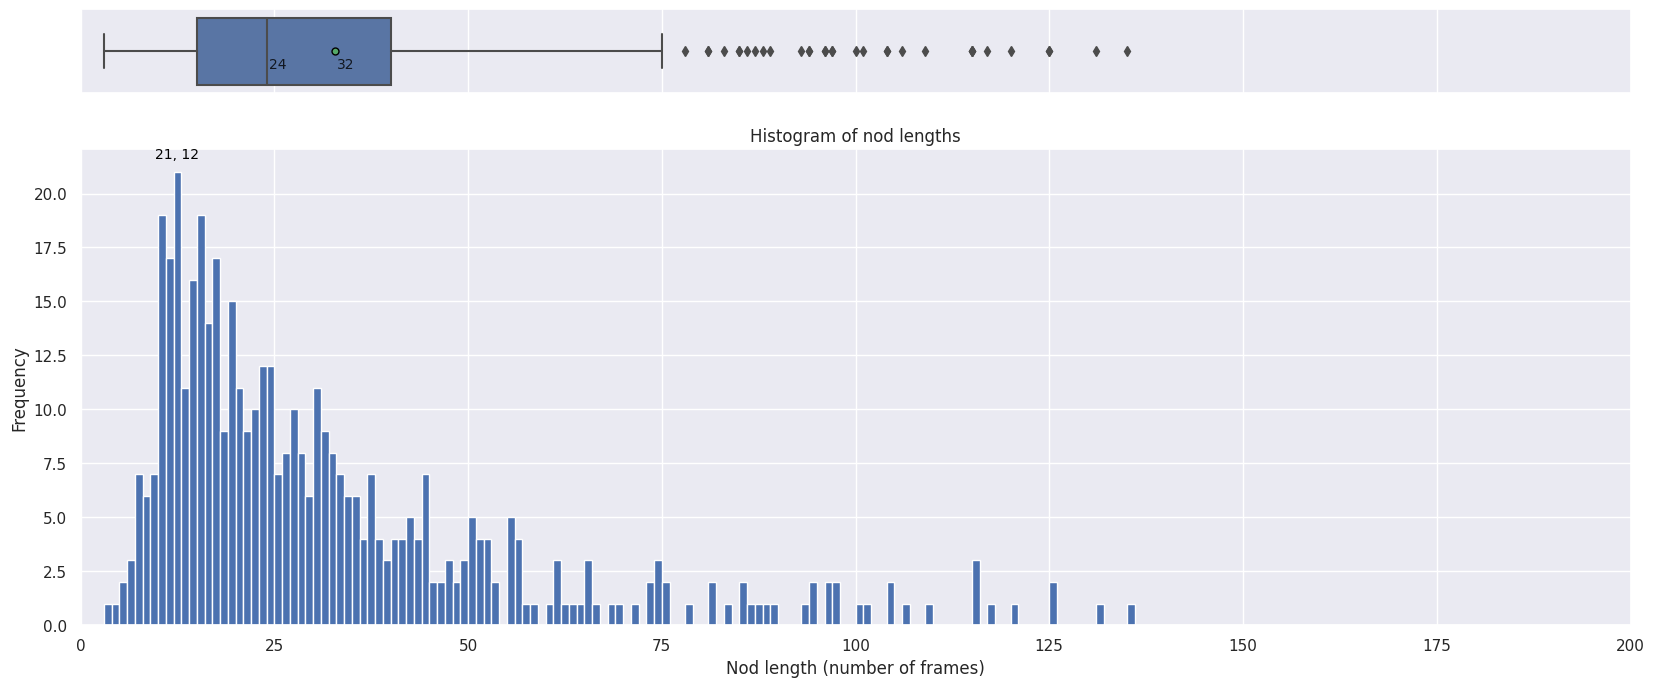

---------
Number of shakes: 2681
Number of nods: 1599
Mean shake length: 23.229019022752706
Mean nod length: 20.477173233270793
Std shake length: 18.254912858225484
Std nod length: 20.106360662768445
Unsure shakes: 84
Unsure nods: 7
2681
Most common shake length:  15


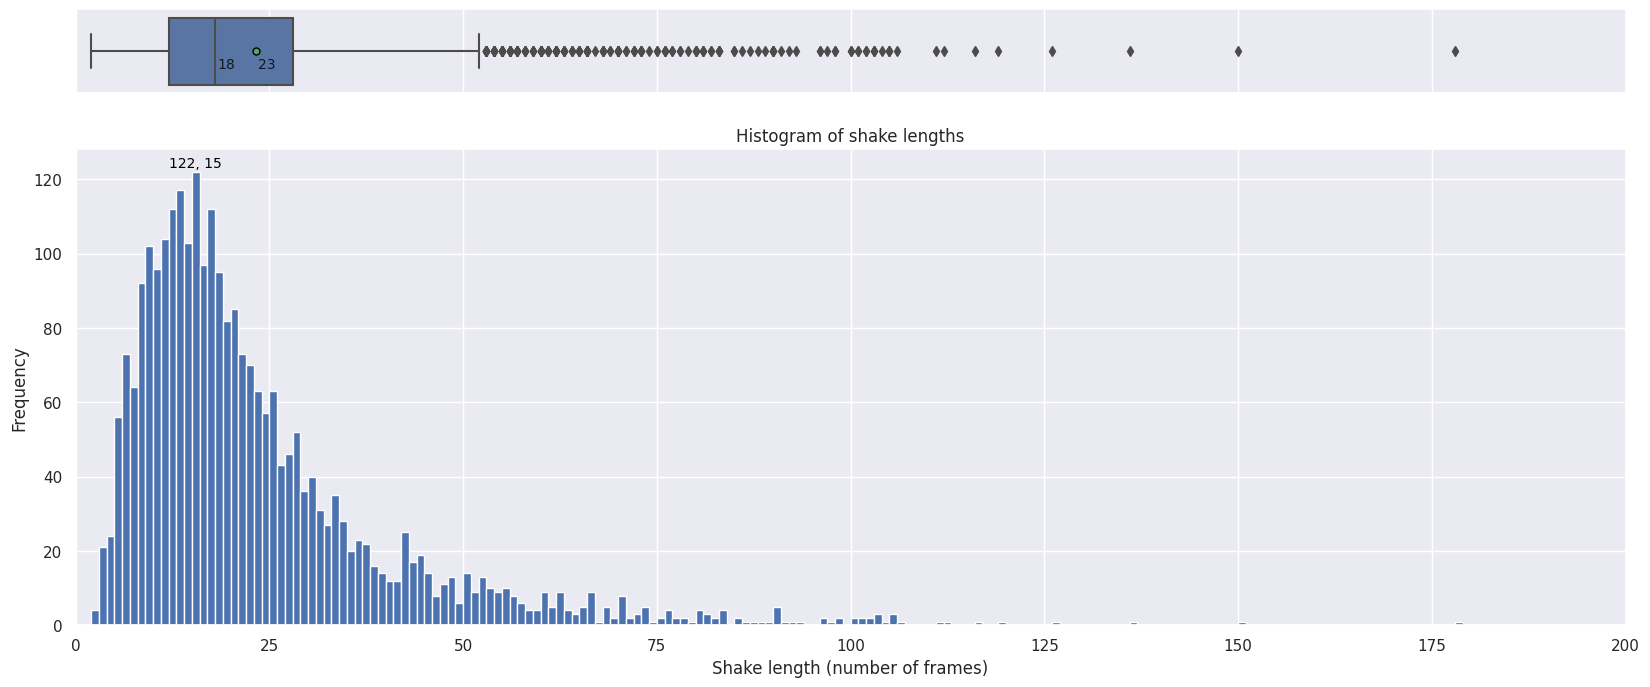

1599
Most common nod length:  11


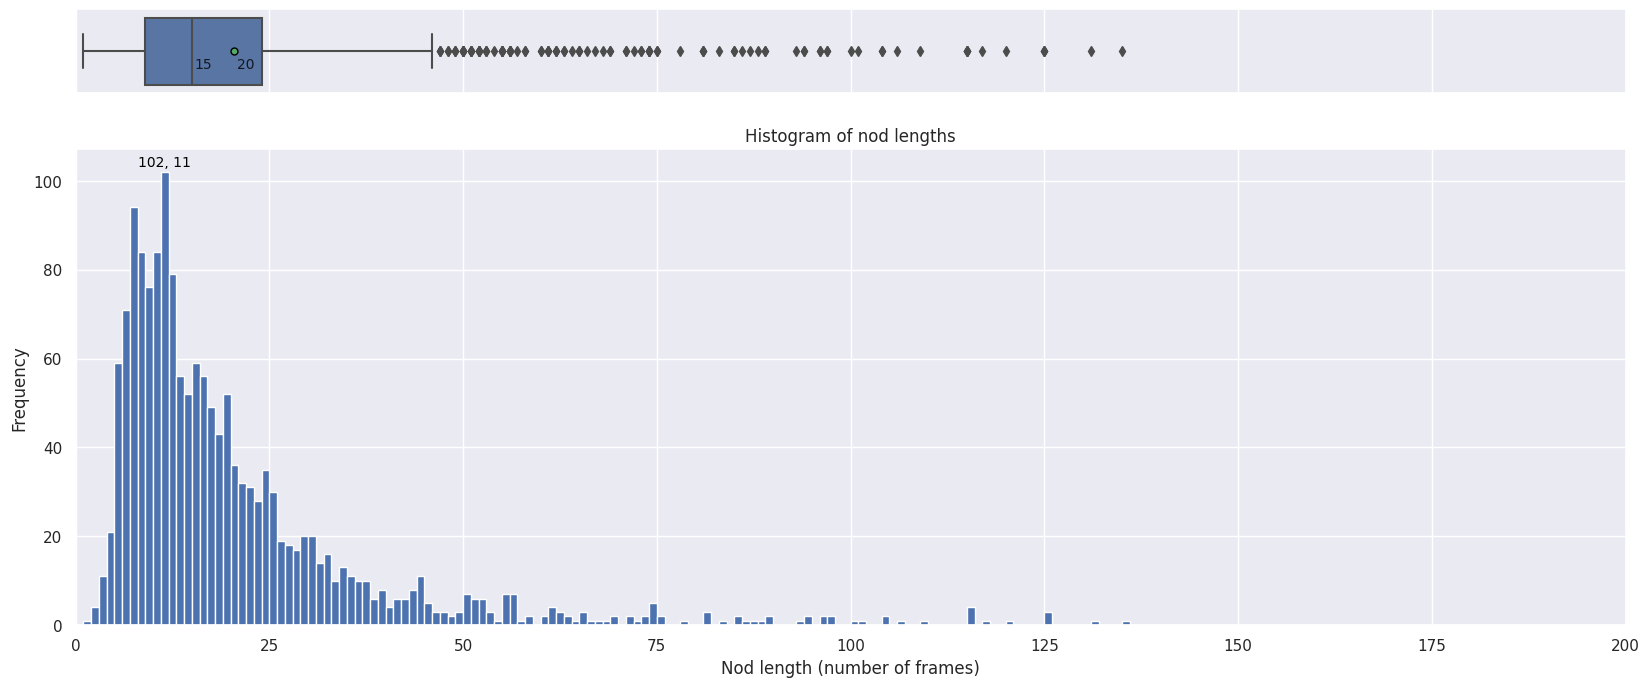

---------
Number of shakes: 2864
Number of nods: 2699
Mean shake length: 23.204608938547487
Mean nod length: 28.432011856243054
Std shake length: 18.618225016902976
Std nod length: 30.21403378866751
Unsure shakes: 50
Unsure nods: 7
2864
Most common shake length:  15


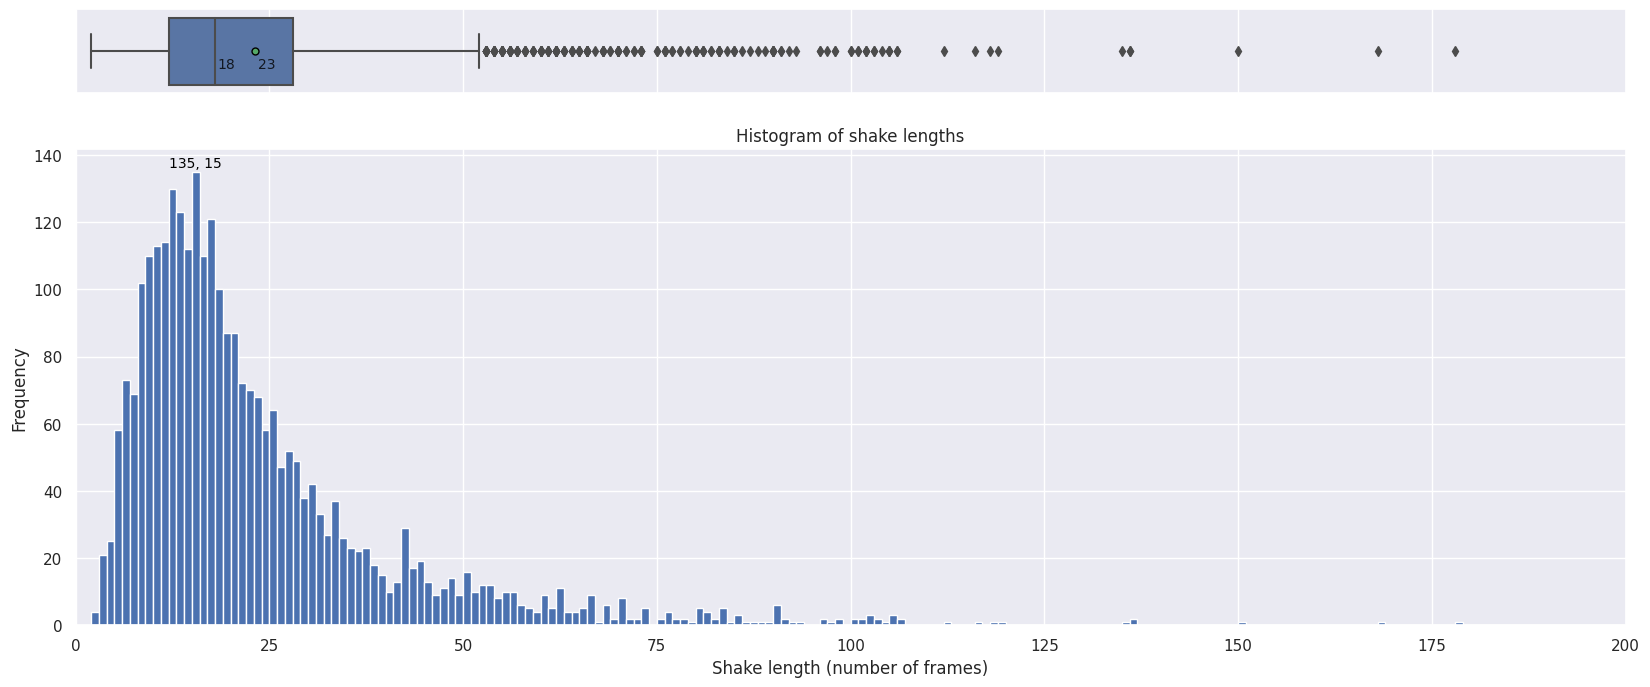

2699
Most common nod length:  11


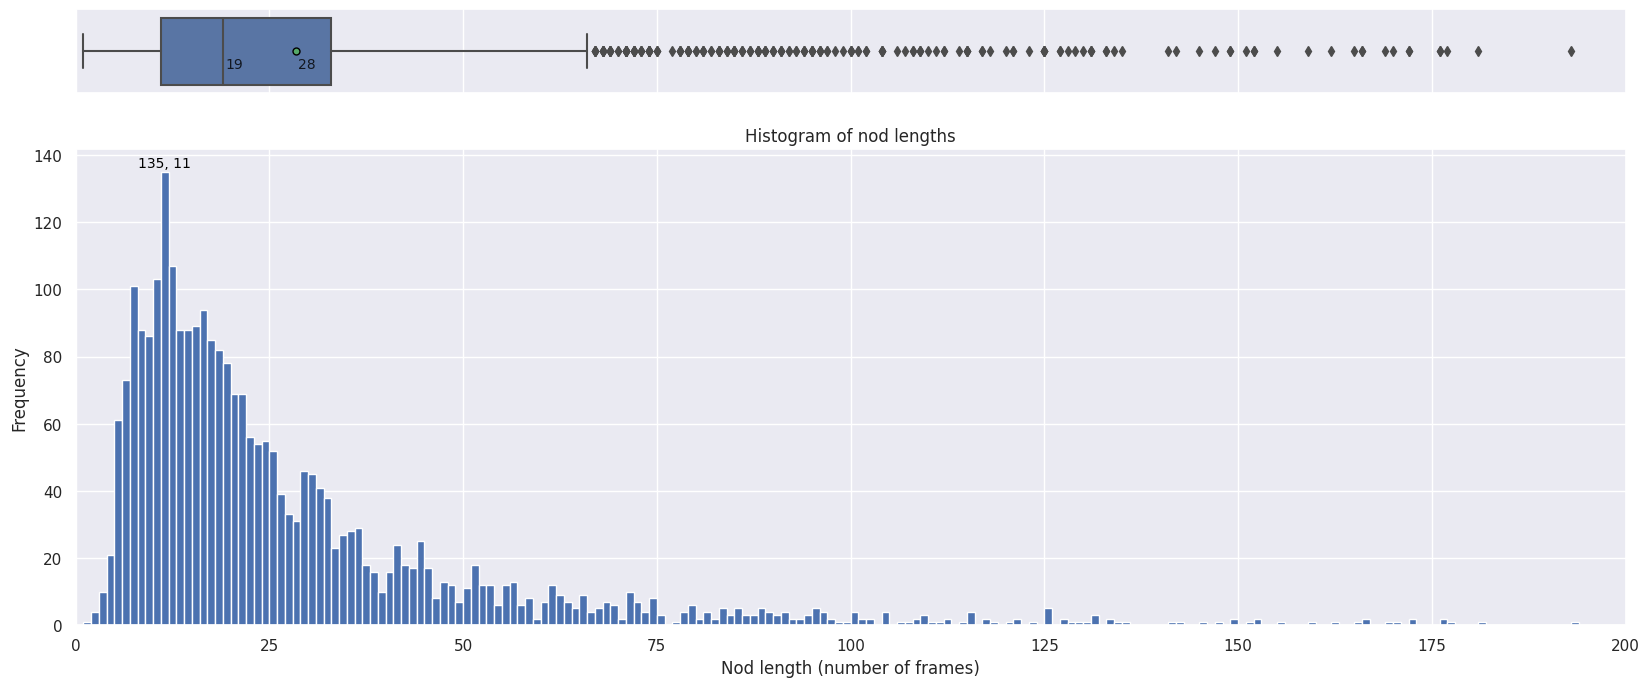

In [50]:
from dataset.labels.create_label_files import label_statistics as label_statistics

# Create label files for the frames given all eaf files
label_statistics('data/eaf_files/v0', 'data/output/frames_v1.csv')
print("---------")
label_statistics('data/eaf_files/v1', 'data/output/frames_v1.csv')
print("---------")
label_statistics('data/eaf_files/v2', 'data/output/frames_v2.csv')
print("---------")
label_statistics('data/eaf_files/v3', 'data/output/frames_v2.csv')

In [32]:
def graph_event_versions(shakes, nods, labels, title):
    """
    Plot multiple lines on a single graph.

    Parameters:
    - shake_data: List of lists containing shake event data for different versions.
    - nod_data: List of lists containing nod event data for different versions.
    - labels: List of labels for the x-axis.
    - title: Title of the graph.
    """
    import matplotlib.pyplot as plt
    
    SMALL_SIZE = 13
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 20

    # Check that the data lengths are consistent
    assert len(shakes) == len(nods) == len(labels), "Data length mismatch"

    x = labels
    plt.plot(x, shakes, label='shake', linestyle='-', linewidth=2)
    plt.plot(x, nods, label='nod', linestyle='-', linewidth=2)
    plt.xticks(x, labels)
    plt.title(title)
    plt.xlabel('Versions')
    plt.ylabel('Number of events')
    plt.ylim(ymin=0)  # this line
    plt.legend()

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.show()

Nr of nods:  428
Nr of tiers that contain a nod:  24
Nr of shakes:  1898
Nr of tiers that contain a shake:  193
Nr of tiers:  194
Labels saved!
Number of shakes: 1898
Number of nods: 428
Background frames train/val/test:  616112  /  140145  /  164931
Shake frames train/val/test:  32667  /  7820  /  10352
Nod frames train/val/test:  9244  /  2277  /  2746
Shake events train/val/test:  1164  /  303  /  406  =  1873
Nod events train/val/test:  276  /  68  /  80  =  424


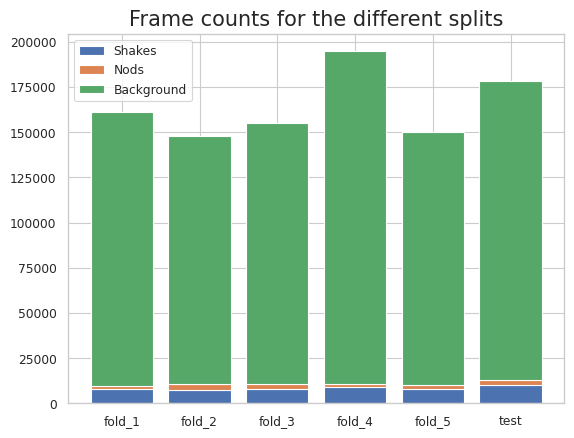

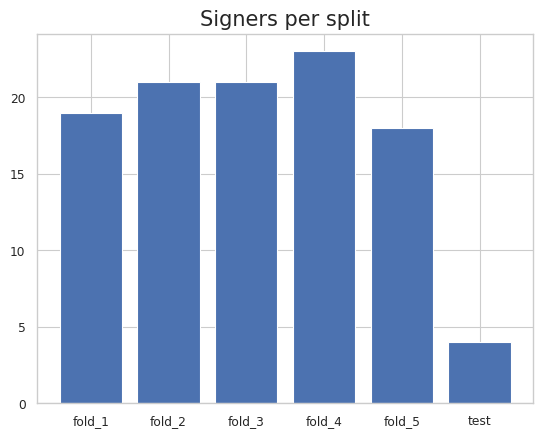

Nr of nods:  461
Nr of tiers that contain a nod:  27
Nr of shakes:  1906
Nr of tiers that contain a shake:  194
Nr of tiers:  194
Labels saved!
Number of shakes: 1906
Number of nods: 461
Background frames train/val/test:  615031  /  140145  /  164931
Shake frames train/val/test:  32877  /  7820  /  10352
Nod frames train/val/test:  10115  /  2277  /  2746
Shake events train/val/test:  1172  /  303  /  406  =  1881
Nod events train/val/test:  308  /  68  /  80  =  456


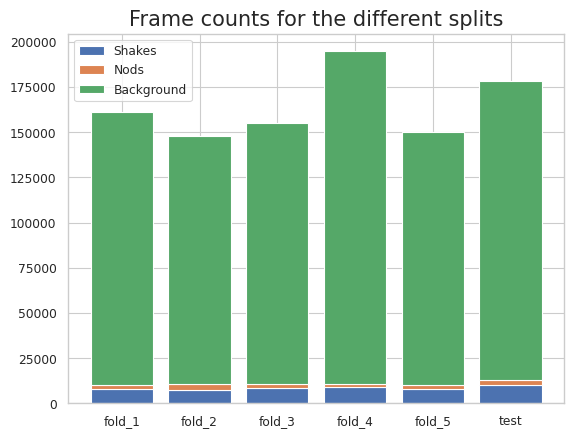

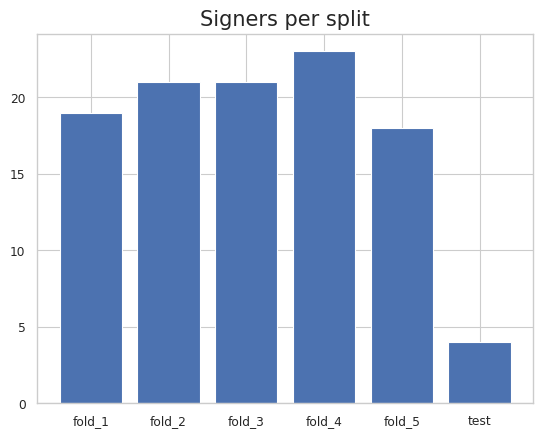

Nr of nods:  1599
Nr of tiers that contain a nod:  1165
Nr of shakes:  2681
Nr of tiers that contain a shake:  969
Nr of tiers:  2107
Labels saved!
Number of shakes: 2681
Number of nods: 1599
Background frames train/val/test:  684752  /  140145  /  164931
Shake frames train/val/test:  43501  /  7820  /  10352
Nod frames train/val/test:  27720  /  2277  /  2746
Shake events train/val/test:  1947  /  303  /  406  =  2656
Nod events train/val/test:  1446  /  68  /  80  =  1594


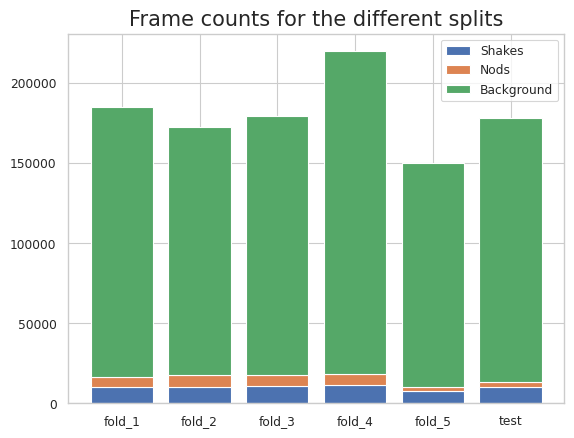

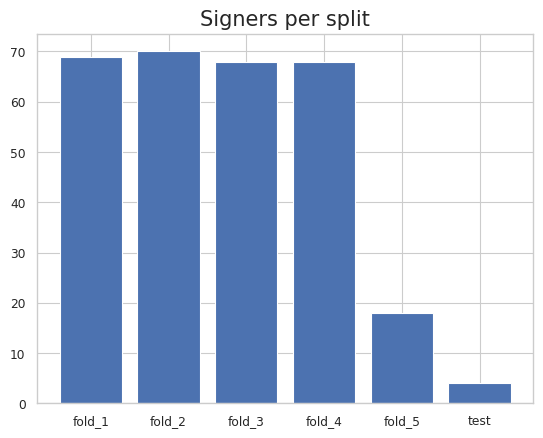

Nr of nods:  2699
Nr of tiers that contain a nod:  1228
Nr of shakes:  2864
Nr of tiers that contain a shake:  968
Nr of tiers:  2107
Labels saved!
Number of shakes: 2864
Number of nods: 2699
Background frames train/val/test:  684752  /  114288  /  143243
Shake frames train/val/test:  43501  /  9294  /  12428
Nod frames train/val/test:  27720  /  26660  /  22358
Shake events train/val/test:  1947  /  381  /  499  =  2827
Nod events train/val/test:  1446  /  654  /  591  =  2691


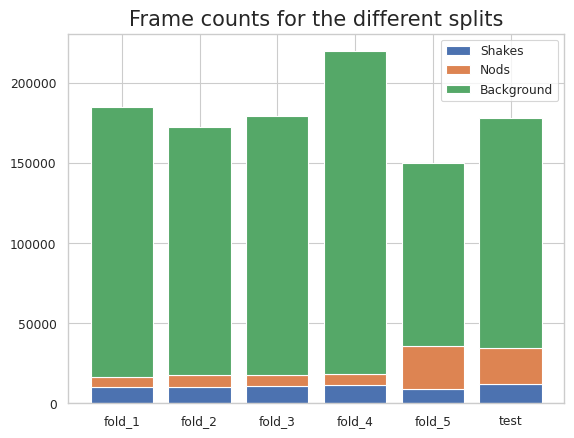

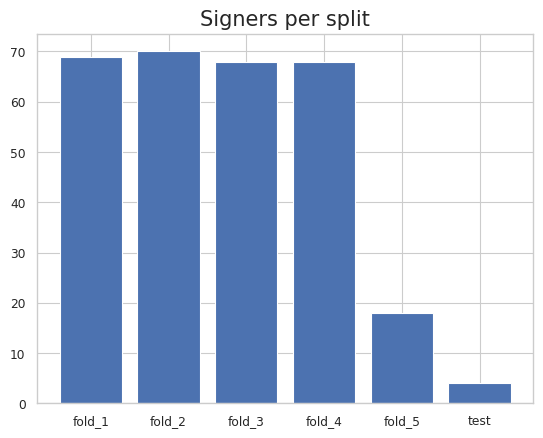

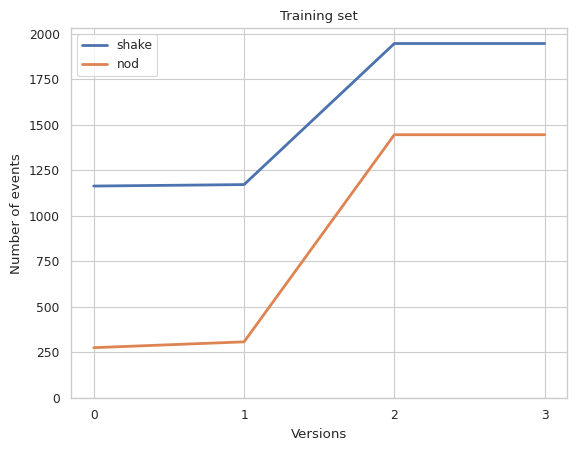

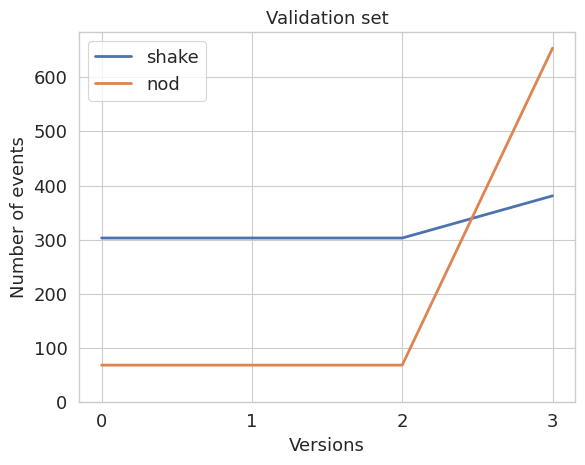

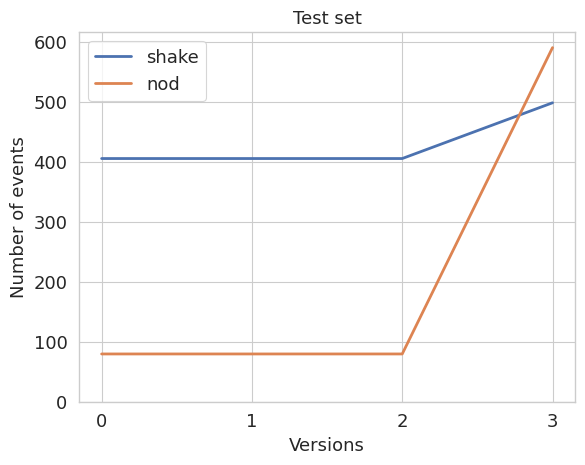

In [36]:
# show some statistics
from dataset.labels.create_label_files import main as create_label_files
from dataset.statistics.split_statistics import main as split_statistics

count_shakes_nods('data/output/frames_v1.csv', 'v0')
create_label_files('data/eaf_files/v0', 'data/output', 'data/output/frames_v1.csv', add_starts_ends=True)
shake_dict_0, nod_dict_0 = split_statistics('data/output/frames_v1.csv')

count_shakes_nods('data/output/frames_v1.csv', 'v1')
create_label_files('data/eaf_files/v1', 'data/output', 'data/output/frames_v1.csv', add_starts_ends=True)
shake_dict_1, nod_dict_1 = split_statistics('data/output/frames_v1.csv')

count_shakes_nods('data/output/frames_v2.csv', 'v2')
create_label_files('data/eaf_files/v2', 'data/output', 'data/output/frames_v2.csv', add_starts_ends=True)
shake_dict_2, nod_dict_2 = split_statistics('data/output/frames_v2.csv')

count_shakes_nods('data/output/frames_v2.csv', 'v3')
create_label_files('data/eaf_files/v3', 'data/output', 'data/output/frames_v2.csv', add_starts_ends=True)
shake_dict_3, nod_dict_3 = split_statistics('data/output/frames_v2.csv')

graph_event_versions([shake_dict_0['train'], shake_dict_1['train'], shake_dict_2['train'], shake_dict_3['train']], [nod_dict_0['train'], nod_dict_1['train'], nod_dict_2['train'], nod_dict_3['train']], ['0', '1', '2', '3'], 'Training set')
graph_event_versions([shake_dict_0['val'], shake_dict_1['val'], shake_dict_2['val'], shake_dict_3['val']], [nod_dict_0['val'], nod_dict_1['val'], nod_dict_2['val'], nod_dict_3['val']], ['0', '1', '2', '3'], 'Validation set')
graph_event_versions([shake_dict_0['test'], shake_dict_1['test'], shake_dict_2['test'], shake_dict_3['test']], [nod_dict_0['test'], nod_dict_1['test'], nod_dict_2['test'], nod_dict_3['test']], ['0', '1', '2', '3'], 'Test set')